# Experiment with the CIFAR10 dataset demos, which classifies 32-by-32 colour images in the 10 categories airplane, automobile, bird, cat, deer, dog, frog, horse, ship and truck
# Check the following link for more information http://www.cs.toronto.edu/~kriz/cifar.html

# Exercise
### In this exercise, you will experiment with cifar10 dataset where you will use the same architecture similar to the one used to train the mnist dataset.
### The model accuracy using this structure is nearly 70%. Therefore, your task is to hyper tune the training process to increase the model accuracy by 10%.
### As a starting point you can have a look at the following tool for more information about cifar10 model and its accuracy: https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html

In [1]:
##############################################################################################################################
#Tuning Deep Learning Models                                                                                                 #
#Tuning is the process of improving the performance of ML models.                                                            #
#Some variables that affect your models’ performance include:                                                                #
#•	having more or less data to train with                                                                                   #
#•	having more or less to test with                                                                                         #
#•	having more or less to validate with                                                                                     #
#•	having more or fewer epochs                                                                                              #
#•	having more or fewer layers                                                                                              #
#•	the types of layers you use                                                                                              #
#•	the order of the layers                                                                                                  #
##############################################################################################################################

# Download cifar10 dataset

In [2]:
#Import cifar10 dataset
from tensorflow.keras.datasets import cifar10

In [3]:
#Now load the datset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Explore the cifar10 dataset

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 1)

How many samples, the cifar10 dataset has? add your answer here.

# Visulise the dataset

In [8]:
#Import matplotlib
import matplotlib.pyplot as plt

In [9]:
#Import seaborn
import seaborn as sns

In [10]:
#Select the font scale
sns.set(font_scale=2)

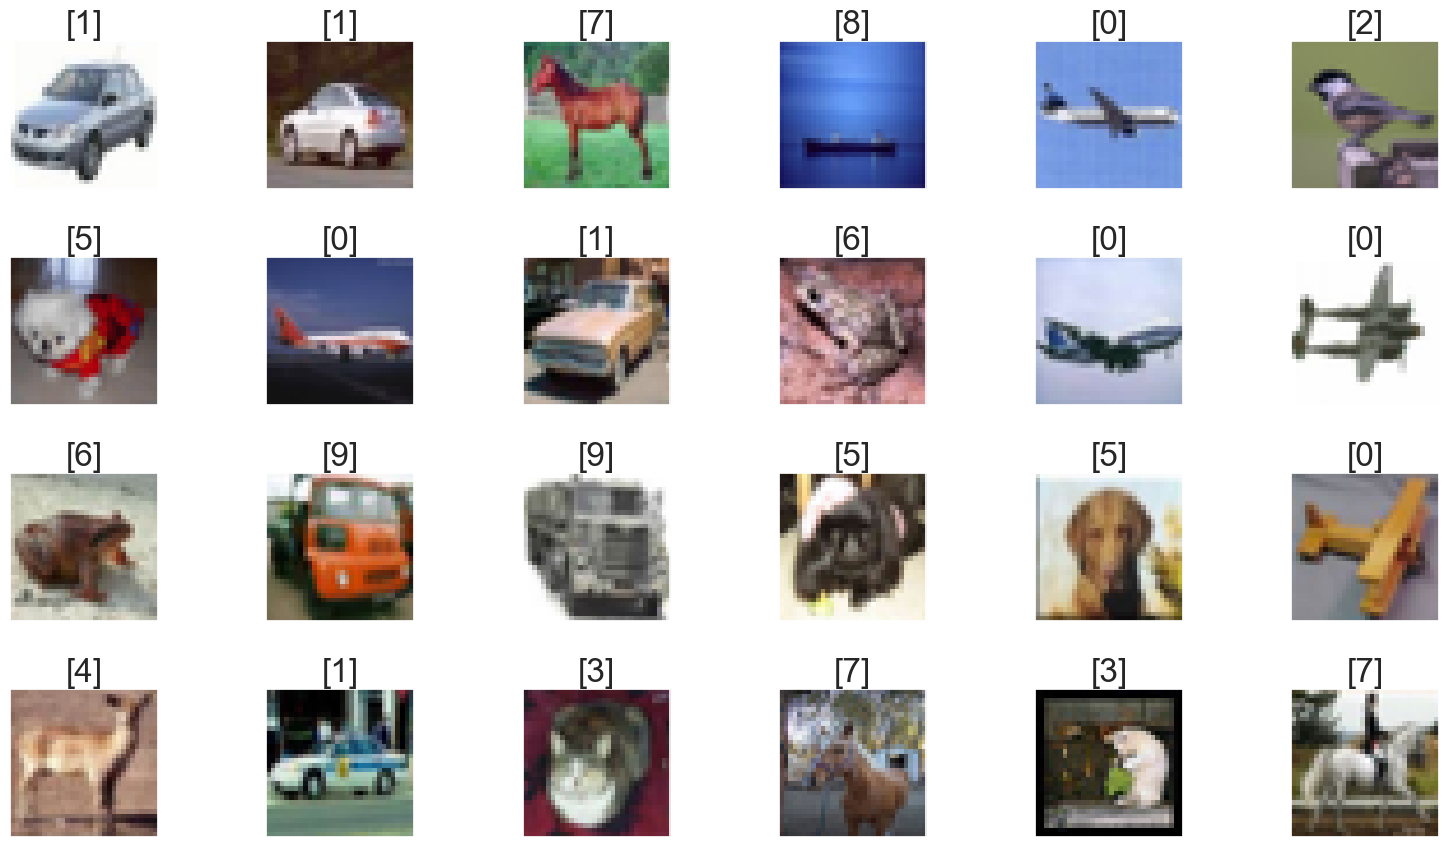

In [11]:
#Run this snippet multiple times to see additional randomly selected digits.
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

# Normalizing the Image Data

In [12]:
#Do you still remember what is normalisation?
#Write it here
#Now normalise the X_train
X_train = X_train.astype('float32') / 255

In [13]:
#Do the same for X_test
X_test = X_test.astype('float32') / 255

# One-Hot Encoding: Converting the Labels From Integers to Categorical Data

In [14]:
num_classes = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer",
                   "dog", "frog", "horse", "ship", "truck"]
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes)
y_train.shape


(50000, 10)

In [15]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [16]:
y_test = to_categorical(y_test, num_classes)
y_test.shape

(10000, 10)

# Creating the Neural Network

In [17]:
#Import sequential from keras models
from tensorflow.keras.models import Sequential
cnn = Sequential()

# Adding Layers to the Network

In [18]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

# Adding a Convolution Layer

In [19]:
cnn.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Dimensionality of the First Convolution Layer’s Output

# Adding a Pooling Layer

In [20]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Adding Another Convolutional Layer and Pooling Layer

In [21]:
cnn.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the Results

In [22]:
cnn.add(Flatten())

# Adding a Dense Layer to Reduce the Number of Features

In [23]:
cnn.add(Dense(units=128, activation='relu'))

# Adding Another Dense Layer to Produce the Final Output

In [24]:
cnn.add(Dense(units=10, activation='softmax'))

# Printing the Model’s Summary

In [25]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 620,810 (2.37 MB)

 Trainable params: 620,810 (2.37 MB)

 Non-trainable params: 0 (0.00 B)

# Visualizing a Model’s Structure

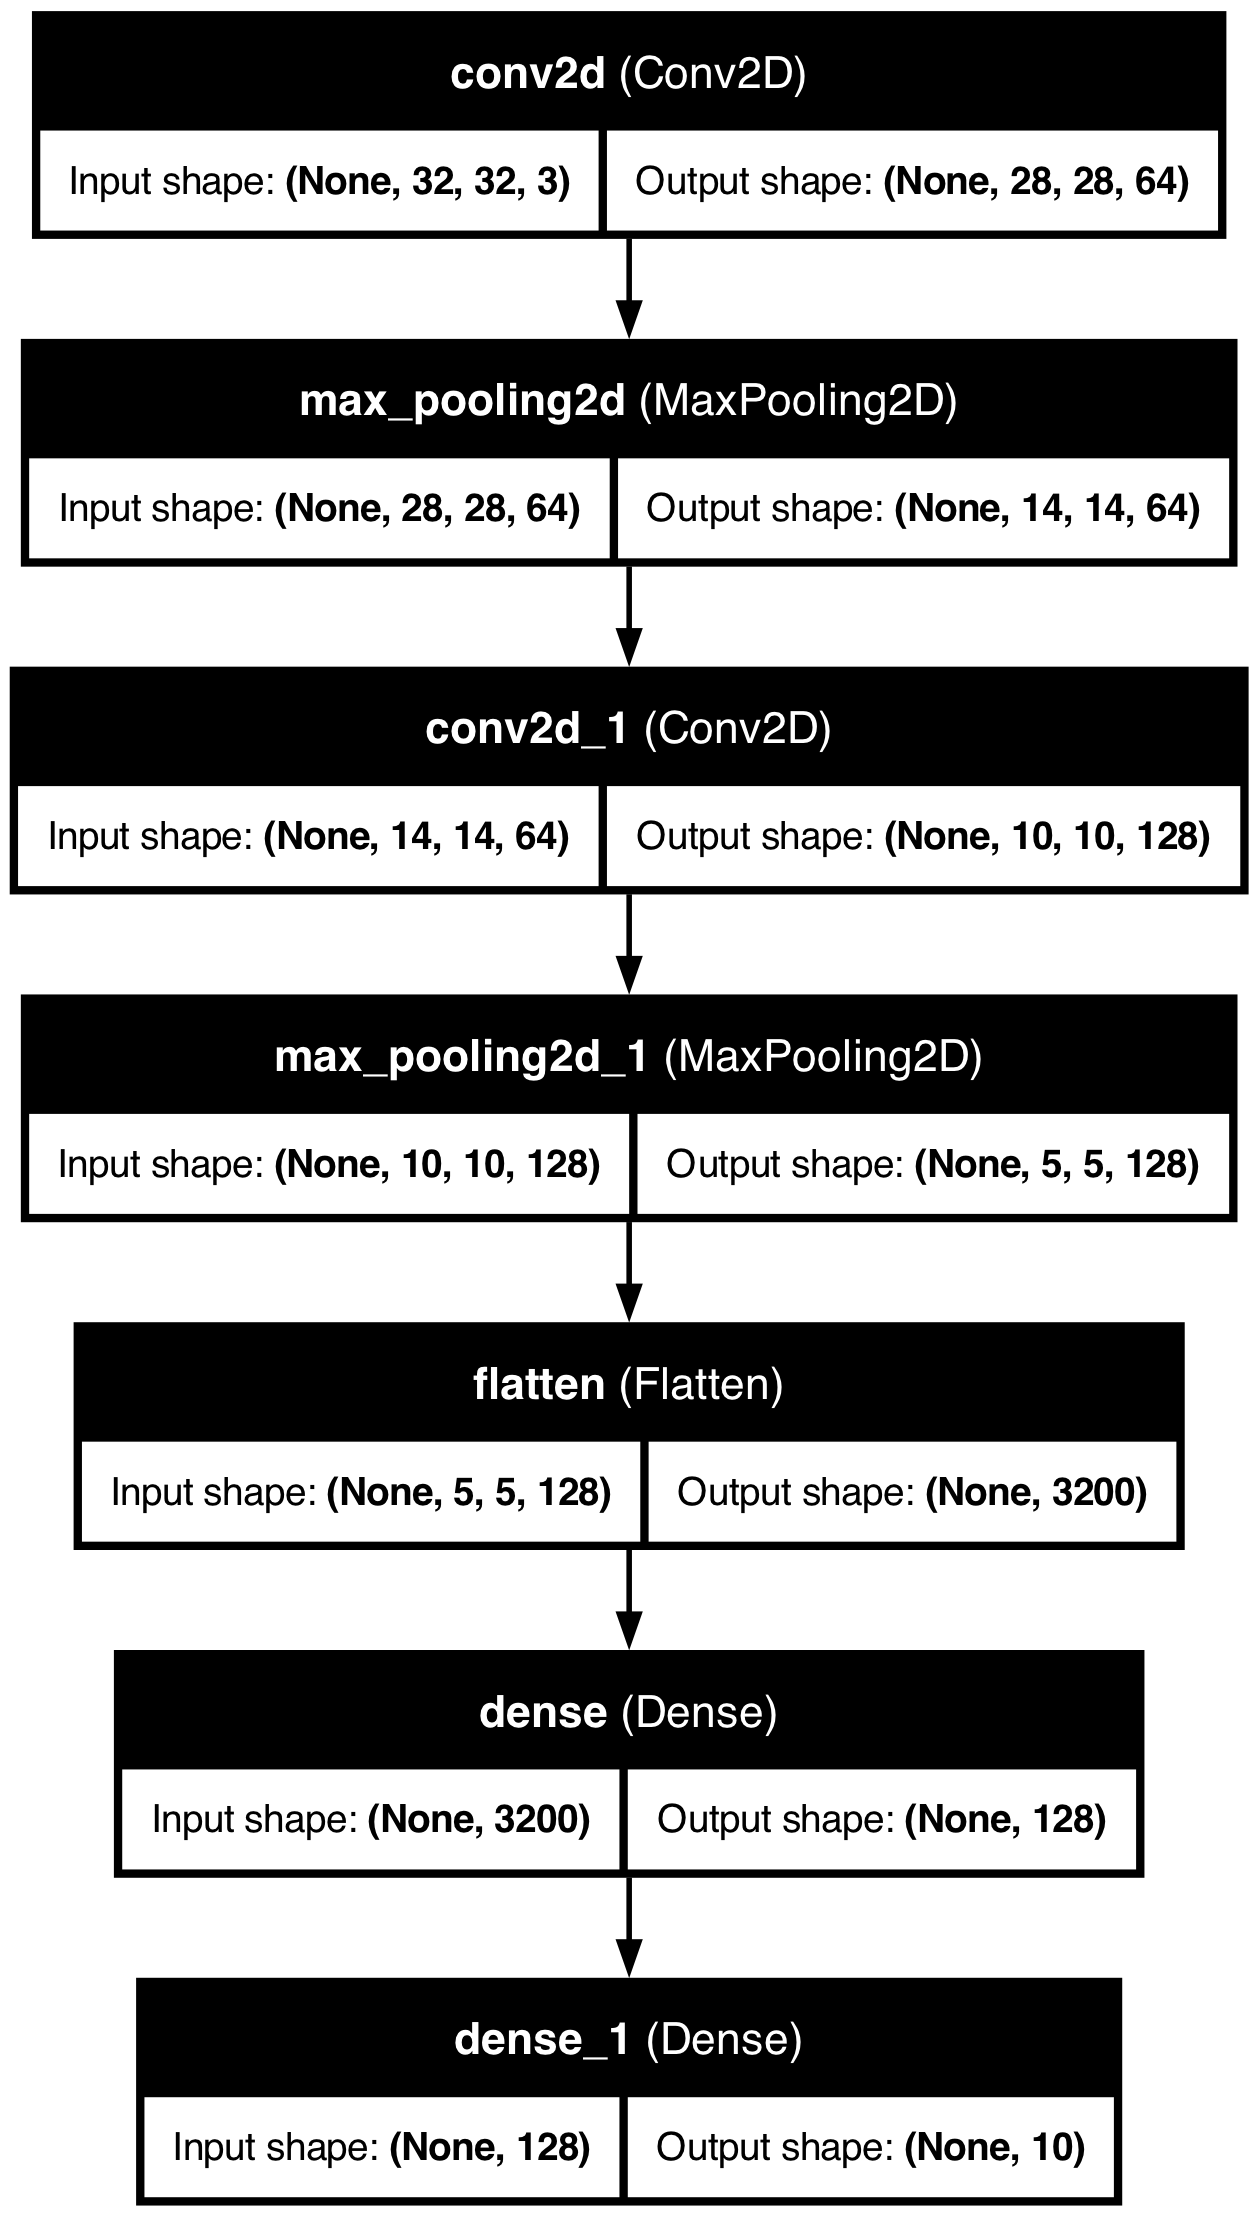

In [26]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
            show_layer_names=True)
Image(filename='convnet.png')

# Compiling the Model

In [27]:
cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


# Training and Evaluating the Model

In [28]:
cnn.fit(X_train, y_train, epochs=20, batch_size=32,
              validation_split=0.01)

Epoch 1/20
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.3688 - loss: 1.7101 - val_accuracy: 0.5260 - val_loss: 1.3077
Epoch 2/20
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.5927 - loss: 1.1535 - val_accuracy: 0.6400 - val_loss: 1.0221
Epoch 3/20
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.6542 - loss: 0.9892 - val_accuracy: 0.6340 - val_loss: 1.0206
Epoch 4/20
 819/1547 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.6910 - loss: 0.8858

KeyboardInterrupt: 

# Evaluating the Model

In [ ]:
loss, accuracy = cnn.evaluate(X_test, y_test)

In [ ]:
loss

In [ ]:
accuracy

# Making Predictions

In [ ]:
predictions = cnn.predict(X_test)

In [ ]:
y_test[0]

In [ ]:
for index, probability in enumerate(predictions[0]):
          print(f'{index}: {probability:.10%}')

# Locating the Incorrect Predictions

In [ ]:
images = X_test
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:
        incorrect_predictions.append(
            (i, images[i], predicted, expected))

In [ ]:
len(incorrect_predictions)

# Visualizing Incorrect Predictions

In [ ]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(
        f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

# Displaying the Probabilities for Several Incorrect Predictions

In [ ]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')


In [ ]:
display_probabilities(predictions[495])

In [ ]:
display_probabilities(predictions[583])

# Saving and Loading a Model

In [ ]:
cnn.save('cifar10_cnn.h5')

In [ ]:
from tensorflow.keras.models import load_model
cnn = load_model('cifar10_cnn.h5')